In [151]:
#Tmporting dataset
import pandas as pd
import numpy as np
import os
import re
from scipy import stats
from scipy.stats import norm, skew
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
# importing the datasets into Pandas dataframes
data_test = pd.read_csv('/content/sample_data/application_test.csv')
df_test = data_test.copy()
data_train = pd.read_csv('/content/sample_data/application_train.csv')
df_train = data_train.copy()

The training dataset features 307,511 observation for 122 features. The testing dataset features 48,744 observations for 121 features (the same features as in the training set minus the 'TARGET' variable.

In [154]:
(df_train.shape, df_test.shape)

((71818, 122), (48744, 121))

In [155]:
##Exploring the dataset
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

##Exploratory Visualization <a id="exploration_viz"></a>

In this section, we provided data visualizations that  extracts relevant  feature of selected features in our dataset.

#Feature: 'TARGET'

The feature 'TARGET' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'TARGET' by using other related features associated with the client's personal, professional, and credit history. <br>

In [158]:
target = df_train['TARGET']  #target variable

In [159]:
target.value_counts()

0    66035
1     5783
Name: TARGET, dtype: int64

Let's plot a histogram to visualize the distribution of TARGET in the Training dataset.

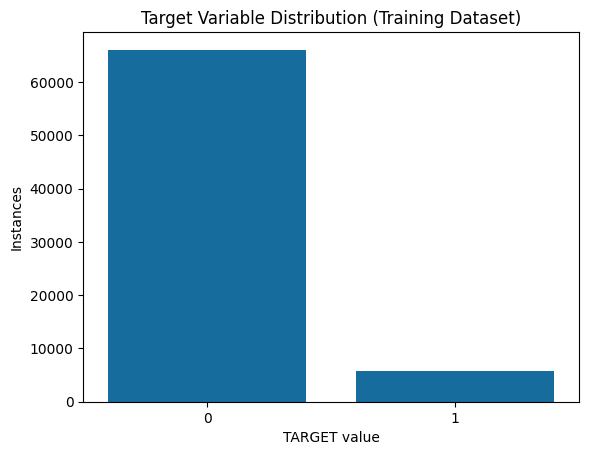

In [160]:
plt.ylabel('Instances')
plt.xlabel('TARGET value')
plt.title('Target Variable Distribution (Training Dataset)')
sns.countplot(x='TARGET', data=df_train);

In [161]:
target.value_counts()[0]/(target.value_counts()[0]+target.value_counts()[1])

0.9194770113342059

Observations with 'TARGET' value at 0 constitue 91.9% of the Training dataset.

###Feature: 'DAYS_BIRTH'

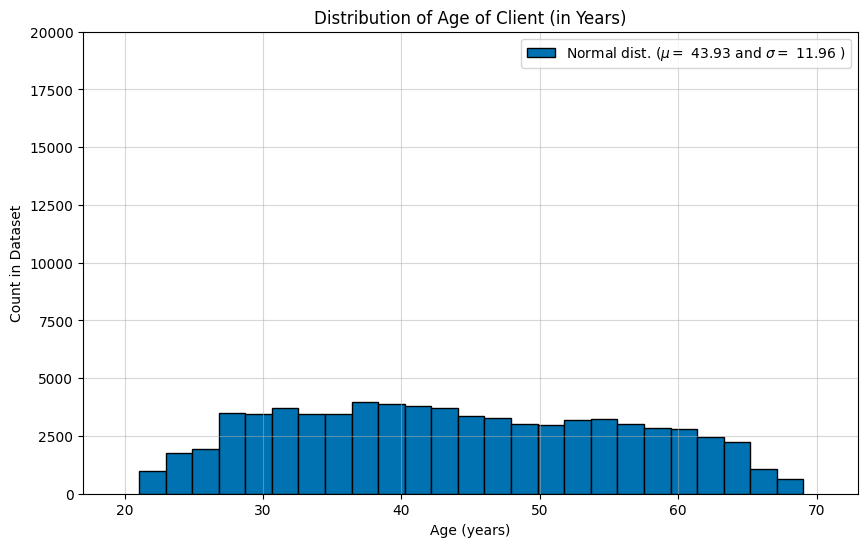

In [162]:
import numpy as np
from scipy.stats import norm

# Filter out non-finite values from age_years
age_years_valid = age_years[np.isfinite(age_years)]

# Fit the normal distribution to the filtered age_years
(mu, sigma) = norm.fit(age_years_valid)

# Plotting code (same as before)
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
plt.hist(age_years_valid, edgecolor='k', bins=25)
plt.xlim(17, 73)
plt.ylim(0, 20000)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.title('Distribution of Age of Client (in Years)')
plt.xlabel('Age (years)')
plt.ylabel('Count in Dataset')
plt.show()


As we can see below, the plot indicates that the ratio of loans not repaid (Target=1) decreases as the client ages. In other words, the client's ability to repay their loan seems to improve with the client's age.

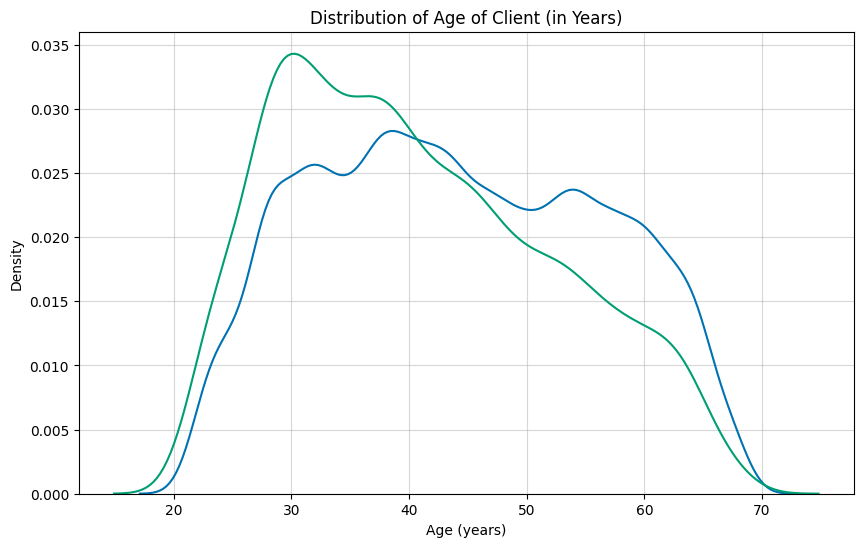

In [163]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'Repaid Loan')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'Not Repaid Loan')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Age of Client (in Years)');

The plot below, shows the unrepaid loans (Target=1) grouped together in brackets corresponding go the Client's Age. The plot clearly indicates that as the client ages, the rate of unpaid loan decreases.

In [164]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data.loc[:,'DAYS_BIRTH'].copy() / -365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups.drop(['DAYS_BIRTH'], axis=1, inplace=True)

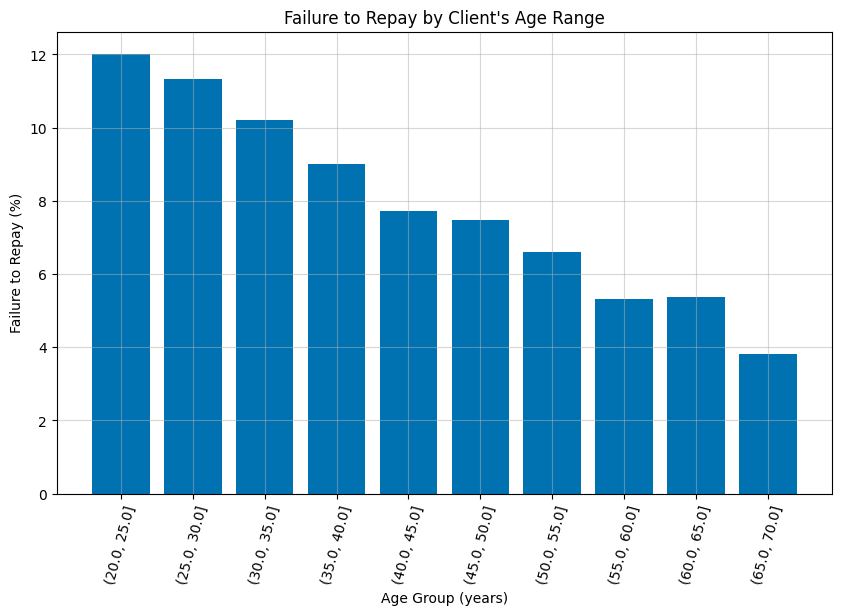

In [165]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Client\'s Age Range');

###Feature: 'NAME_CONTRACT_TYPE'

The feature 'NAME_CONTRACT_TYPE' identifies if loan is cash or revolving. The vast majority of loans were 'Cash' loans, at 90.5% of loans in the Training set.

In [166]:
df_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         65048
Revolving loans     6770
Name: NAME_CONTRACT_TYPE, dtype: int64

The chart below shows the types and contracts in the training set by target value. The ratio of loans not repaid (Target =1) for Cash loans is 8.35%, while the ratio of loans not repaid (Target =1) for Revolding loans is 5.48%.

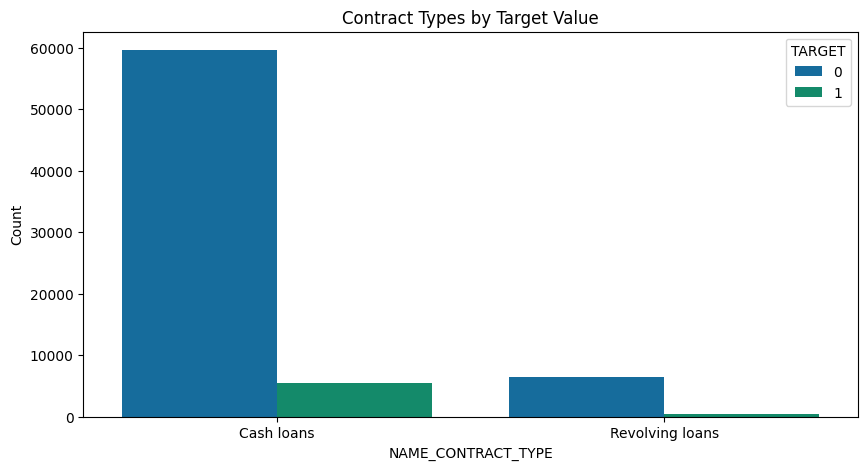

In [167]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(10,5))
plt.ylabel('Count')
plt.title('Contract Types by Target Value')
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df_train);

###Feature: 'AMT_CREDIT'

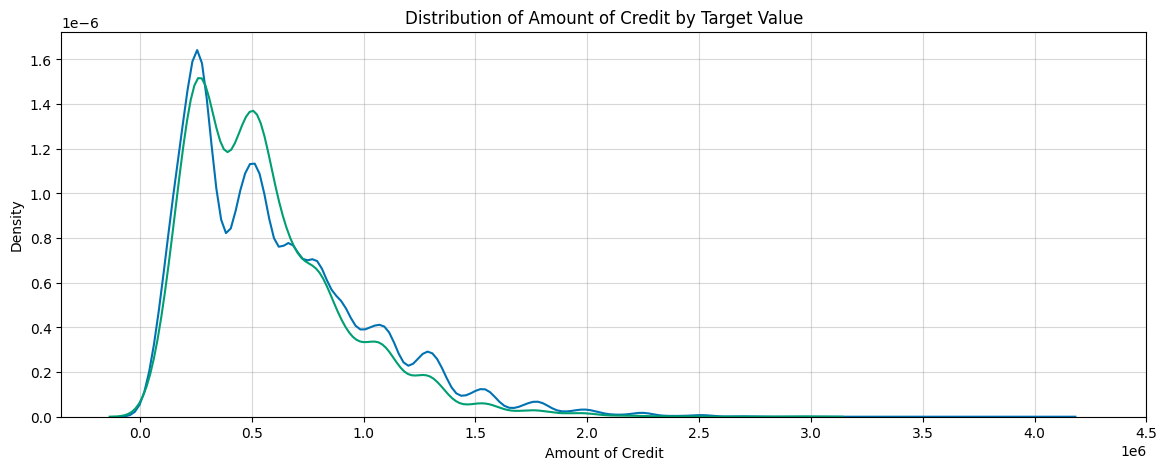

In [168]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'AMT_CREDIT'],
            label = 'Repaid Loan')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'AMT_CREDIT'],
            label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit')
plt.xticks(np.arange(0, 5000000, 500000))
plt.ylabel('Density')
plt.title('Distribution of Amount of Credit by Target Value');

###Feature: 'DAYS_EMPLOYED'

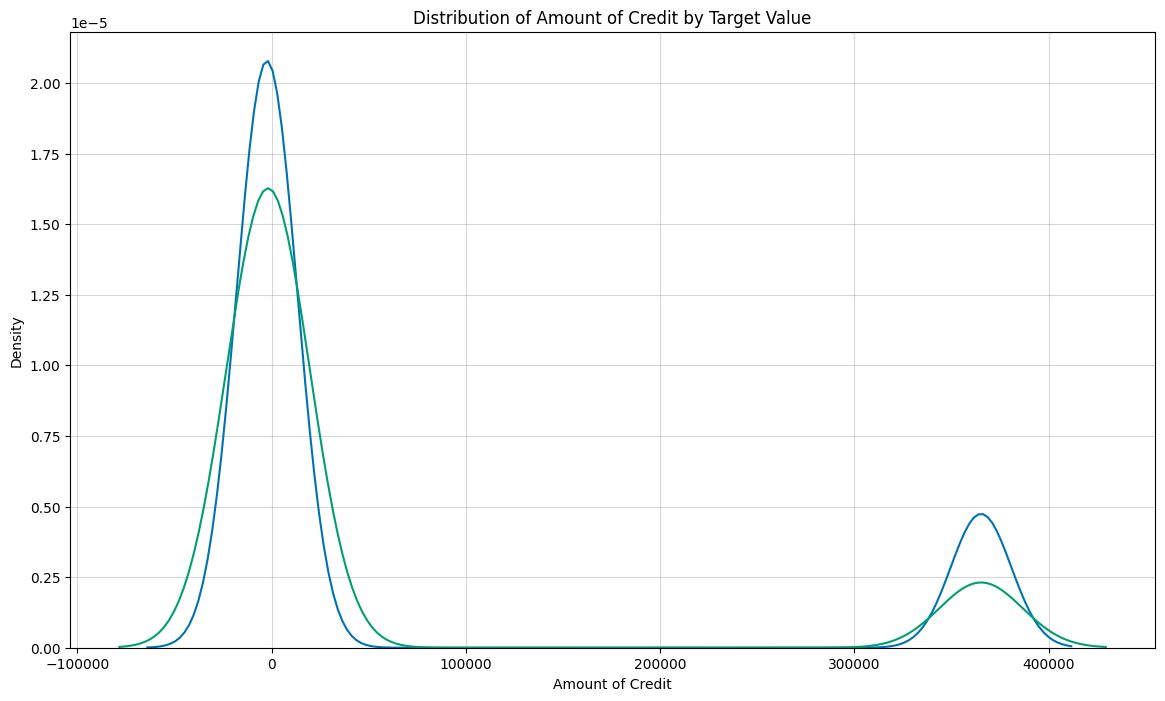

In [169]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_EMPLOYED'],
            label = 'Repaid Loan')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_EMPLOYED'],
            label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit')
plt.ylabel('Density')
plt.title('Distribution of Amount of Credit by Target Value');

In [170]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 DAYS_LAST_PHONE_CHANGE         0.055608
REGION_RATING_CLIENT_W_CITY    0.062941
REGION_RATING_CLIENT           0.063450
DAYS_BIRTH                     0.079066
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 EXT_SOURCE_3    -0.177491
EXT_SOURCE_2    -0.161179
EXT_SOURCE_1    -0.154261
DAYS_EMPLOYED   -0.041487
FLOORSMAX_AVG   -0.041461
Name: TARGET, dtype: float64


In [171]:
df_train_corr = df_train[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
                          'DAYS_LAST_PHONE_CHANGE','FLOORSMAX_AVG','DAYS_EMPLOYED','EXT_SOURCE_1',
                          'EXT_SOURCE_2', 'EXT_SOURCE_3']].copy()

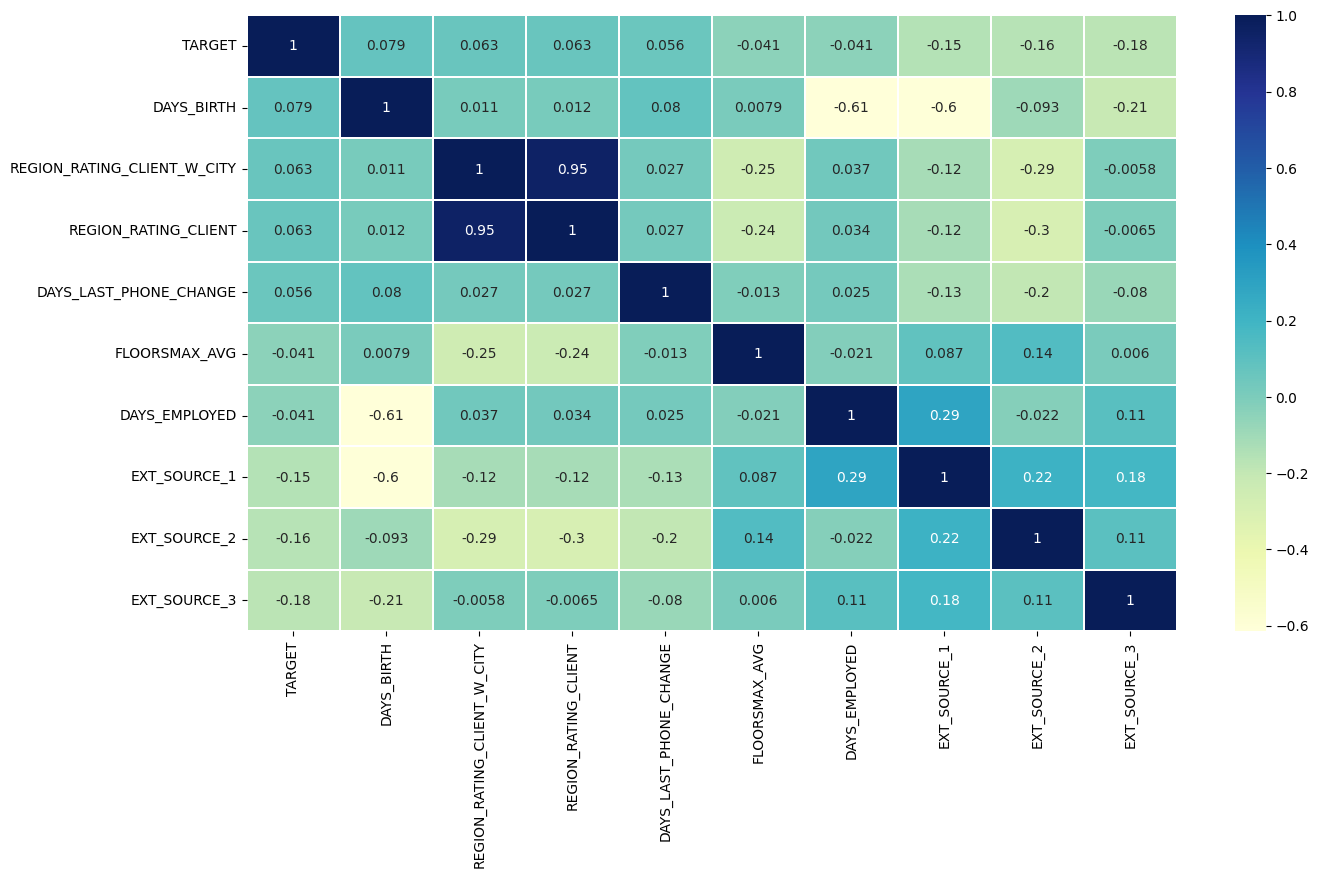

In [172]:
# Calculate correlations
corr = df_train_corr.corr()
# Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, linewidths=.2, cmap="YlGnBu");

In [173]:
# Align the training and testing data, keep only columns present in both dataframes
df_train = df_train.drop('TARGET', axis=1) #drop target variable from training dataset
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

In [174]:
df_train.shape, target.shape, df_test.shape

((71818, 121), (71818,), (48744, 121))

In [175]:
#assing an extra variable to training and testing dataset before joining them
df_train['training_set'] = True
df_test['training_set'] = False

In [176]:
df_full = pd.concat([df_train, df_test]) #concatenate both dataframes
df_full = df_full.drop('SK_ID_CURR', axis=1) #drop SK_ID_CURR variable
df_full.shape

(120562, 121)

The size of the joined full dataset df_full is 356,255 obersvations for 121 features.

In [177]:
print('Size of Full dataset df_full is: {}'.format( df_full.shape))

Size of Full dataset df_full is: (120562, 121)


####Label Encoding and One-Hot Encoding <a id="encoding"></a>

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding and One Hot Encoding becomes necessary as they encode categorical labels with value between 0 and 1.

In [178]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [179]:
# let's break down the columns by their type (i.e. int64, float64, object)
df_full.dtypes.value_counts()

float64    103
object      16
int64        1
bool         1
dtype: int64

In [180]:
le_count = 0
for col in df_full.columns[1:]:
    if df_full[col].dtype == 'object':
        if len(list(df_full[col].unique())) <= 2:
            le.fit(df_full[col])
            df_full[col] = le.transform(df_full[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [181]:
# convert rest of categorical variable into dummy
df_full = pd.get_dummies(df_full)

Encoding the features increased the number of features in our dataset to 243.

In [182]:
print('Size of Full Encoded Dataset', df_full.shape)

Size of Full Encoded Dataset (120562, 243)


**bold text**### 4.3 Feature Engineering <a id="feature_eng"></a>

Feature Engineering is the process of creating the most useful features out of the data. Feature engineering typically involves both creating new features from the existing data, and feature selection by choosing only the most important features.

####Features: FLAG_DOCUMENT

The datasets features 20 variables related to whether a client has provided a particular form. Let's see if these variables can be dropped from the training dataset by looking at the correlation between the FLAG_DOCUMENT variables and the TARGET variable.

In [183]:
df_train['TARGET'] = target
df_doc_corr = df_train[['TARGET','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
                        'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
                        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                        'FLAG_DOCUMENT_21']].copy()

In [184]:
# Find correlations with the target and sort
correlations = df_doc_corr.corr()['TARGET'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 FLAG_DOCUMENT_12   -0.001104
FLAG_DOCUMENT_19   -0.000051
FLAG_DOCUMENT_2     0.008135
FLAG_DOCUMENT_3     0.044820
TARGET              1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 FLAG_DOCUMENT_6    -0.027965
FLAG_DOCUMENT_13   -0.014476
FLAG_DOCUMENT_16   -0.012862
FLAG_DOCUMENT_8    -0.010223
FLAG_DOCUMENT_14   -0.008888
Name: TARGET, dtype: float64


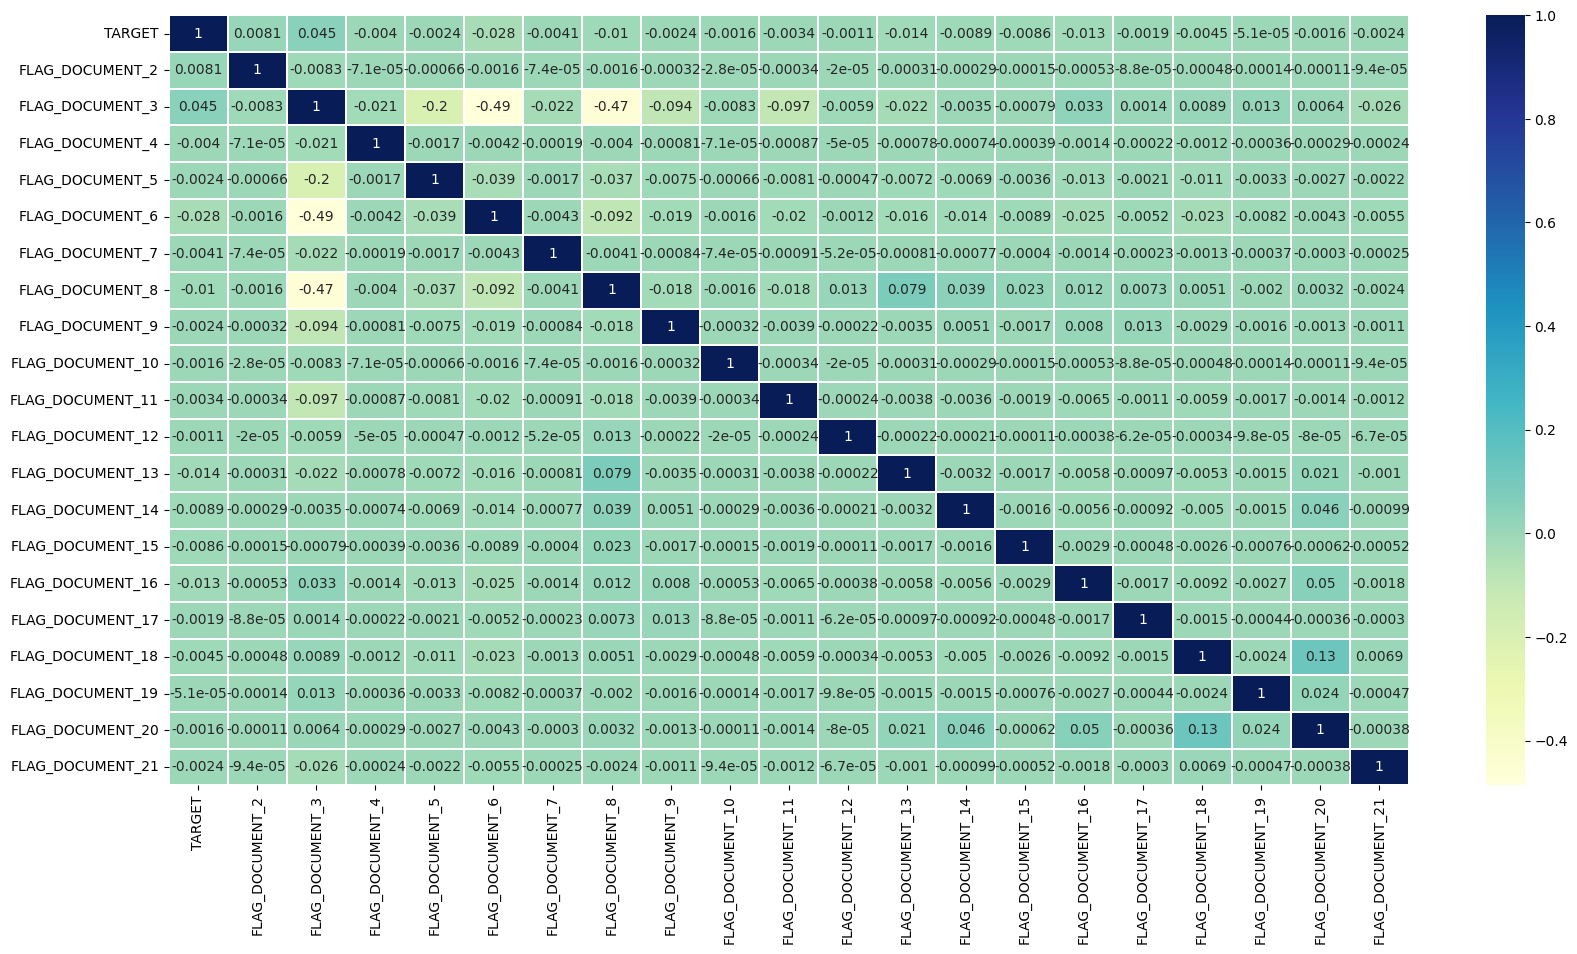

In [185]:
# Calculate correlations
corr = df_doc_corr.corr()
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, linewidths=.2, cmap="YlGnBu");

In [186]:
df_full = df_full.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                        'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15'], axis=1)

####Missing Values and Feature Scaling <a id="missing"></a>

In [187]:
def missing_val_ratio(df):
    perc_na = (df.isnull().sum()/len(df))*100
    ratio_na = perc_na.sort_values(ascending=False)
    missing_data_table = pd.DataFrame({'% of Total Values' :ratio_na})
    return missing_data_table

In [188]:
df_full_miss = missing_val_ratio(df_full)
df_full_miss.head(20)

,% of Total Values
COMMONAREA_AVG,69.370946
COMMONAREA_MEDI,69.370946
COMMONAREA_MODE,69.370946
NONLIVINGAPARTMENTS_AVG,68.979446
NONLIVINGAPARTMENTS_MEDI,68.979446
NONLIVINGAPARTMENTS_MODE,68.979446
LIVINGAPARTMENTS_MODE,67.906140
LIVINGAPARTMENTS_MEDI,67.906140
LIVINGAPARTMENTS_AVG,67.906140
FLOORSMIN_MEDI,67.292348


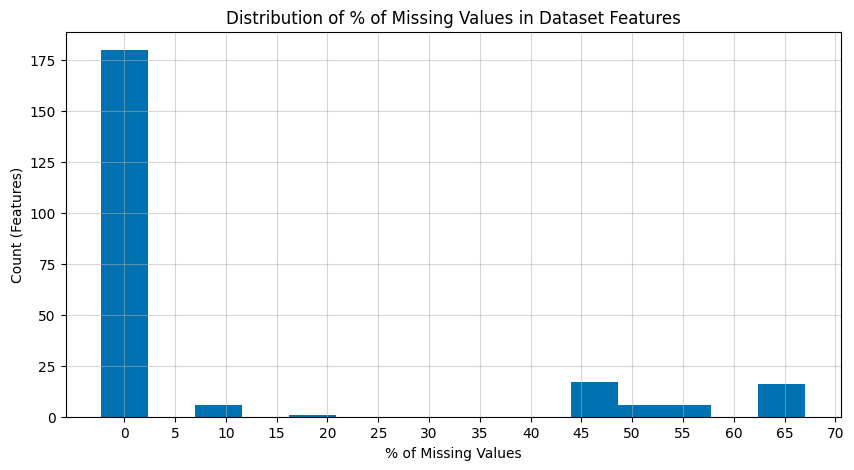

In [189]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
x = df_full_miss['% of Total Values']
x.hist(align='left', bins= 15)
plt.xticks(np.arange(0, 75, 5))
plt.xlabel('% of Missing Values')
plt.ylabel('Count (Features)')
plt.title('Distribution of % of Missing Values in Dataset Features');
plt.show();

To improve the performance of the Machine Learning arlgorithms, we kept all features and address the missing values by replacing them with the median value if the feature is numerical and with "N/A" if the feature is categorical. <br>

In [190]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Median imputation of missing values
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale each feature to 0-1


In [191]:
for column in df_full.columns:
    df_full[[column]] = imputer.fit_transform(df_full[[column]])
    df_full[[column]] = scaler.fit_transform(df_full[[column]])

In [192]:
df_full_miss = missing_val_ratio(df_full)
df_full_miss.head(5)

,% of Total Values
FLAG_OWN_CAR,0.0
ORGANIZATION_TYPE_Agriculture,0.0
OCCUPATION_TYPE_Sales staff,0.0
OCCUPATION_TYPE_Secretaries,0.0
OCCUPATION_TYPE_Security staff,0.0


###Results <a id="results"></a>

###Data Preparation <a id="preparation"></a>

In [193]:
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)
df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

The final training set consists of 307,511 obersations of 232 features while the testing set is made up of 48,744 observations of 231 features.

In [194]:
print('Size of training_set: ', df_train.shape)
print('Size of testing_set: ', df_test.shape)

Size of training_set:  (71818, 231)
Size of testing_set:  (48744, 231)


In [195]:
print('Size of target: ', target.shape)
print('Size of original data_test: ', data_test.shape)

Size of target:  (71818,)
Size of original data_test:  (48744, 121)


###Logistic Regression <a id="logistic"></a>

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(random_state=42)

# Train on the training data
log_reg.fit(df_train, target)

# Predict on the test data
log_reg_predict = log_reg.predict(df_test)

###Random Forest <a id="random"></a>

In [197]:
random_forest_pred = rf_model.predict_proba(df_test)[:, 1]
random_forest_pred

array([0.06, 0.05, 0.02, ..., 0.02, 0.05, 0.11])

###Light GBM <a id="gbm"></a>

In [198]:
import re

# Define a function to remove special characters from column names
def remove_special_characters(column_name):
    return re.sub(r'[^\w\s]', '', column_name)

# Remove special characters from column names in df_train
df_train.columns = [remove_special_characters(col) for col in df_train.columns]

# Now, fit the LightGBM classifier again
LGB_clf.fit(df_train, target)
LGB_clf_pred = LGB_clf.predict_proba(df_test)[:, 1]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5783, number of negative: 66035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11085
[LightGBM] [Info] Number of data points in the train set: 71818, number of used features: 220
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080523 -> initscore=-2.435262
[LightGBM] [Info] Start training from score -2.435262


###LightGBM Classifier HyperParameters

In [199]:
LGBM_clf = LGBMClassifier(n_estimators = 10000,
                          learning_rate = 0.02,
                          min_data_in_leaf = 30,
                          num_leaves = 31,
                          boosting_type='gbdt',
                          objective='binary',
                          metric='binary_logloss')
LGBM_clf.fit(df_train, target)
LGBM_clf_pred = LGBM_clf.predict_proba(df_test)[:, 1]

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 5783, number of negative: 66035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11073
[LightGBM] [Info] Number of data points in the train set: 71818, number of used features: 214
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080523 -> initscore=-2.435262
[LightGBM] [Info] Start training from score -2.435262
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_lea

In [200]:
# Make a submission dataframe
submission = data_test[['SK_ID_CURR']]
submission['TARGET'] = LGBM_clf_pred

###summary table of teh ROC AUC scores for each algorithm.

In [201]:
d = {'1. Logistic Regression': [0.504],
     '2. Default Random Forest': [0.610],
     '4. Default Light GBM': [0.745],
     '3. Tuned Random Forest': [0.723],
     '5. Tuned Light GBM': [0.758]}
d_i = ['ROC AUC Score']
df_results = pd.DataFrame(data=d, index = d_i)
df_results = df_results.transpose()

In [202]:
df_results

,ROC AUC Score
1. Logistic Regression,0.504
2. Default Random Forest,0.610
4. Default Light GBM,0.745
3. Tuned Random Forest,0.723
5. Tuned Light GBM,0.758


Clearly the tuned Light GBM algorithm provides us with the best ROC AUC score at **0.758**.